# Library

In [1]:
# Library to dataset
import opendatasets as od
import os
import zipfile
import numpy as np

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Others
import shutil
import random

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Ripeness/Dataset/Tomato/train",
    label_mode="categorical",
    class_names= ['damaged','old','ripe','unripe'],
    color_mode="rgb",
    batch_size=10,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Ripeness/Dataset/Tomato/valid",
    label_mode="categorical",
    class_names= ['damaged','old','ripe','unripe'],
    color_mode="rgb",
    batch_size=10,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)

==========================Training Data====================
Found 1626 files belonging to 4 classes.
==========================Validation Data====================
Found 355 files belonging to 4 classes.


In [3]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 10 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Vegetable Ripeness/Dataset/Tomato/train",
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 10 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Vegetable Ripeness/Dataset/Tomato/valid",
                                                         batch_size=10,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 1626 images belonging to 4 classes.
Found 355 images belonging to 4 classes.


# DenseNet 1

In [4]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Tomato_DenseNet_model", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [5]:
# Define DIY Model
DenseNet121_model = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
  ])
DenseNet121_model.layers[0].trainable = False

# Compile Model
DenseNet121_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
DenseNet121_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_max_pooling2d (Globa  (None, 1024)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 7,300,932
Trainable params: 263,428
Non-trainable params: 7,037,504
________________________________________

In [6]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_DenseNet121_model_1 = DenseNet121_model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
162/163 [============================>.] - ETA: 0s - loss: 0.7745 - accuracy: 0.8453
Epoch 1: val_accuracy improved from -inf to 0.90423, saving model to Tomato_DenseNet_model


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


163/163 [==============================] - 49s 255ms/step - loss: 0.7698 - accuracy: 0.8462 - val_loss: 0.2913 - val_accuracy: 0.9042 - lr: 0.0010
Epoch 2/100
163/163 [==============================] - ETA: 0s - loss: 0.1689 - accuracy: 0.9379
Epoch 2: val_accuracy did not improve from 0.90423
163/163 [==============================] - 6s 35ms/step - loss: 0.1689 - accuracy: 0.9379 - val_loss: 0.5868 - val_accuracy: 0.8535 - lr: 0.0010
Epoch 3/100
163/163 [==============================] - ETA: 0s - loss: 0.1705 - accuracy: 0.9502
Epoch 3: val_accuracy improved from 0.90423 to 0.92394, saving model to Tomato_DenseNet_model


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


163/163 [==============================] - 38s 234ms/step - loss: 0.1705 - accuracy: 0.9502 - val_loss: 0.3164 - val_accuracy: 0.9239 - lr: 0.0010
Epoch 4/100
163/163 [==============================] - ETA: 0s - loss: 0.1381 - accuracy: 0.9520
Epoch 4: val_accuracy improved from 0.92394 to 0.94366, saving model to Tomato_DenseNet_model


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


163/163 [==============================] - 39s 239ms/step - loss: 0.1381 - accuracy: 0.9520 - val_loss: 0.1953 - val_accuracy: 0.9437 - lr: 0.0010
Epoch 5/100
163/163 [==============================] - ETA: 0s - loss: 0.1486 - accuracy: 0.9459
Epoch 5: val_accuracy did not improve from 0.94366
163/163 [==============================] - 6s 38ms/step - loss: 0.1486 - accuracy: 0.9459 - val_loss: 0.2073 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 6/100
163/163 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9576
Epoch 6: val_accuracy improved from 0.94366 to 0.96056, saving model to Tomato_DenseNet_model


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


163/163 [==============================] - 40s 245ms/step - loss: 0.1096 - accuracy: 0.9576 - val_loss: 0.1461 - val_accuracy: 0.9606 - lr: 0.0010
Epoch 7/100
162/163 [============================>.] - ETA: 0s - loss: 0.1018 - accuracy: 0.9604
Epoch 7: val_accuracy did not improve from 0.96056
163/163 [==============================] - 6s 38ms/step - loss: 0.1012 - accuracy: 0.9606 - val_loss: 0.2597 - val_accuracy: 0.9408 - lr: 0.0010
Epoch 8/100
163/163 [==============================] - ETA: 0s - loss: 0.1017 - accuracy: 0.9613
Epoch 8: val_accuracy did not improve from 0.96056
163/163 [==============================] - 6s 37ms/step - loss: 0.1017 - accuracy: 0.9613 - val_loss: 0.2082 - val_accuracy: 0.9521 - lr: 0.0010
Epoch 9/100
163/163 [==============================] - ETA: 0s - loss: 0.1257 - accuracy: 0.9477
Epoch 9: val_accuracy improved from 0.96056 to 0.96620, saving model to Tomato_DenseNet_model


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


163/163 [==============================] - 39s 242ms/step - loss: 0.1257 - accuracy: 0.9477 - val_loss: 0.1608 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 10/100
162/163 [============================>.] - ETA: 0s - loss: 0.1006 - accuracy: 0.9666
Epoch 10: val_accuracy improved from 0.96620 to 0.96901, saving model to Tomato_DenseNet_model


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet_model\assets


163/163 [==============================] - 41s 252ms/step - loss: 0.1004 - accuracy: 0.9668 - val_loss: 0.1631 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 11/100
163/163 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9680
Epoch 11: val_accuracy did not improve from 0.96901

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
163/163 [==============================] - 6s 38ms/step - loss: 0.0838 - accuracy: 0.9680 - val_loss: 0.3478 - val_accuracy: 0.9183 - lr: 0.0010
Epoch 12/100
163/163 [==============================] - ETA: 0s - loss: 0.0583 - accuracy: 0.9779
Epoch 12: val_accuracy did not improve from 0.96901
163/163 [==============================] - 6s 37ms/step - loss: 0.0583 - accuracy: 0.9779 - val_loss: 0.1704 - val_accuracy: 0.9690 - lr: 1.0000e-04
Epoch 13/100
163/163 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9840
Epoch 13: val_accuracy did not improve from 0.96901
163/163 [=====================

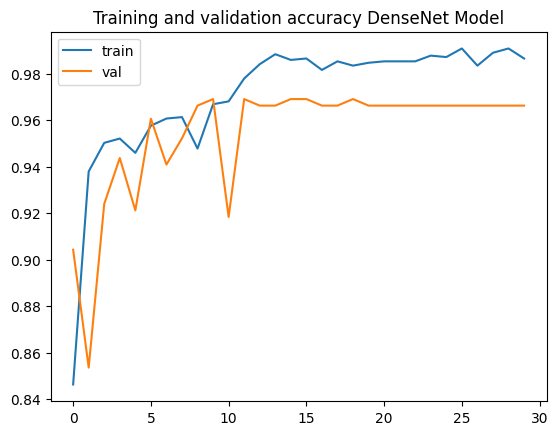

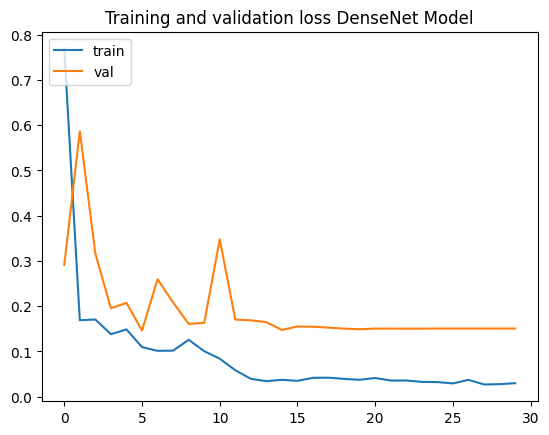

In [7]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_DenseNet121_model_1.history['accuracy' ]
val_acc  = history_DenseNet121_model_1.history['val_accuracy' ]
loss     = history_DenseNet121_model_1.history['loss' ]
val_loss = history_DenseNet121_model_1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy DenseNet Model')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss DenseNet Model')
plt.legend(['train', 'val'], loc='upper left')

# DenseNet 2

In [8]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Tomato_DenseNet2_model", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [9]:
# Define DIY Model
DenseNet121_model2 = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Average Pooling Layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
  ])
DenseNet121_model2.layers[0].trainable = False

# Compile Model
DenseNet121_model2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
DenseNet121_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 7,300,932
Trainable params: 263,428
Non-trainable params: 7,037,504
______________________________________

In [10]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_DenseNet121_model_2 = DenseNet121_model2.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
163/163 [==============================] - ETA: 0s - loss: 0.2755 - accuracy: 0.9010
Epoch 1: val_accuracy improved from -inf to 0.90986, saving model to Tomato_DenseNet2_model


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


163/163 [==============================] - 46s 254ms/step - loss: 0.2755 - accuracy: 0.9010 - val_loss: 0.2546 - val_accuracy: 0.9099 - lr: 0.0010
Epoch 2/100
163/163 [==============================] - ETA: 0s - loss: 0.1499 - accuracy: 0.9440
Epoch 2: val_accuracy improved from 0.90986 to 0.93521, saving model to Tomato_DenseNet2_model


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


163/163 [==============================] - 40s 246ms/step - loss: 0.1499 - accuracy: 0.9440 - val_loss: 0.2132 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 3/100
163/163 [==============================] - ETA: 0s - loss: 0.1391 - accuracy: 0.9440
Epoch 3: val_accuracy did not improve from 0.93521
163/163 [==============================] - 7s 39ms/step - loss: 0.1391 - accuracy: 0.9440 - val_loss: 0.2350 - val_accuracy: 0.9296 - lr: 0.0010
Epoch 4/100
163/163 [==============================] - ETA: 0s - loss: 0.0777 - accuracy: 0.9736
Epoch 4: val_accuracy improved from 0.93521 to 0.94366, saving model to Tomato_DenseNet2_model


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


163/163 [==============================] - 40s 247ms/step - loss: 0.0777 - accuracy: 0.9736 - val_loss: 0.2099 - val_accuracy: 0.9437 - lr: 0.0010
Epoch 5/100
163/163 [==============================] - ETA: 0s - loss: 0.0862 - accuracy: 0.9625
Epoch 5: val_accuracy improved from 0.94366 to 0.94930, saving model to Tomato_DenseNet2_model


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


163/163 [==============================] - 41s 249ms/step - loss: 0.0862 - accuracy: 0.9625 - val_loss: 0.1815 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 6/100
163/163 [==============================] - ETA: 0s - loss: 0.0854 - accuracy: 0.9662
Epoch 6: val_accuracy did not improve from 0.94930
163/163 [==============================] - 6s 38ms/step - loss: 0.0854 - accuracy: 0.9662 - val_loss: 0.2355 - val_accuracy: 0.9268 - lr: 0.0010
Epoch 7/100
163/163 [==============================] - ETA: 0s - loss: 0.1091 - accuracy: 0.9606
Epoch 7: val_accuracy did not improve from 0.94930
163/163 [==============================] - 6s 38ms/step - loss: 0.1091 - accuracy: 0.9606 - val_loss: 0.2027 - val_accuracy: 0.9465 - lr: 0.0010
Epoch 8/100
163/163 [==============================] - ETA: 0s - loss: 0.0780 - accuracy: 0.9643
Epoch 8: val_accuracy improved from 0.94930 to 0.96056, saving model to Tomato_DenseNet2_model


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


163/163 [==============================] - 39s 243ms/step - loss: 0.0780 - accuracy: 0.9643 - val_loss: 0.1229 - val_accuracy: 0.9606 - lr: 0.0010
Epoch 9/100
163/163 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.9686
Epoch 9: val_accuracy improved from 0.96056 to 0.96901, saving model to Tomato_DenseNet2_model


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


163/163 [==============================] - 39s 239ms/step - loss: 0.0789 - accuracy: 0.9686 - val_loss: 0.1180 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 10/100
163/163 [==============================] - ETA: 0s - loss: 0.0511 - accuracy: 0.9766
Epoch 10: val_accuracy did not improve from 0.96901
163/163 [==============================] - 6s 36ms/step - loss: 0.0511 - accuracy: 0.9766 - val_loss: 0.1229 - val_accuracy: 0.9549 - lr: 0.0010
Epoch 11/100
163/163 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 0.9736
Epoch 11: val_accuracy did not improve from 0.96901
163/163 [==============================] - 6s 36ms/step - loss: 0.0687 - accuracy: 0.9736 - val_loss: 0.1410 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 12/100
163/163 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9828
Epoch 12: val_accuracy did not improve from 0.96901
163/163 [==============================] - 6s 36ms/step - loss: 0.0428 - accuracy: 0.9828 - val_loss: 0.1414 - va

INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


163/163 [==============================] - 39s 242ms/step - loss: 0.0413 - accuracy: 0.9859 - val_loss: 0.0856 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 14/100
163/163 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.9815
Epoch 14: val_accuracy did not improve from 0.97183
163/163 [==============================] - 6s 38ms/step - loss: 0.0457 - accuracy: 0.9815 - val_loss: 0.1681 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 15/100
163/163 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9852
Epoch 15: val_accuracy did not improve from 0.97183
163/163 [==============================] - 6s 38ms/step - loss: 0.0390 - accuracy: 0.9852 - val_loss: 0.1714 - val_accuracy: 0.9380 - lr: 0.0010
Epoch 16/100
163/163 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9828
Epoch 16: val_accuracy did not improve from 0.97183
163/163 [==============================] - 6s 38ms/step - loss: 0.0476 - accuracy: 0.9828 - val_loss: 0.2053 - va

INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


163/163 [==============================] - 40s 244ms/step - loss: 0.0317 - accuracy: 0.9895 - val_loss: 0.1280 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 18/100
163/163 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9834
Epoch 18: val_accuracy did not improve from 0.97465

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
163/163 [==============================] - 6s 37ms/step - loss: 0.0391 - accuracy: 0.9834 - val_loss: 0.0999 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 19/100
163/163 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9932
Epoch 19: val_accuracy did not improve from 0.97465
163/163 [==============================] - 6s 38ms/step - loss: 0.0189 - accuracy: 0.9932 - val_loss: 0.1350 - val_accuracy: 0.9746 - lr: 1.0000e-04
Epoch 20/100
163/163 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9957
Epoch 20: val_accuracy did not improve from 0.97465
163/163 [=====================

INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


INFO:tensorflow:Assets written to: Tomato_DenseNet2_model\assets


163/163 [==============================] - 39s 243ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.1356 - val_accuracy: 0.9775 - lr: 1.0000e-04
Epoch 22/100
163/163 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9932
Epoch 22: val_accuracy did not improve from 0.97746
163/163 [==============================] - 6s 37ms/step - loss: 0.0199 - accuracy: 0.9932 - val_loss: 0.1325 - val_accuracy: 0.9775 - lr: 1.0000e-04
Epoch 23/100
163/163 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9951
Epoch 23: val_accuracy did not improve from 0.97746

Epoch 23: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
163/163 [==============================] - 6s 37ms/step - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.1467 - val_accuracy: 0.9746 - lr: 1.0000e-04
Epoch 24/100
163/163 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9945
Epoch 24: val_accuracy did not improve from 0.97746
163/163 [=============

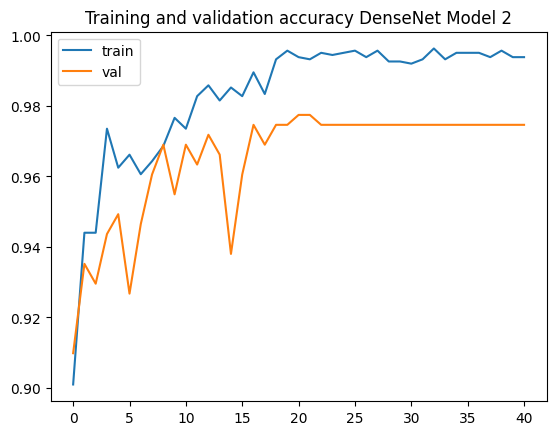

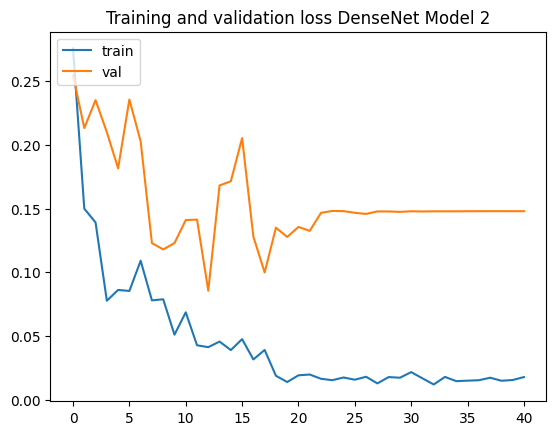

In [11]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_DenseNet121_model_2.history['accuracy' ]
val_acc  = history_DenseNet121_model_2.history['val_accuracy' ]
loss     = history_DenseNet121_model_2.history['loss' ]
val_loss = history_DenseNet121_model_2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy DenseNet Model 2')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss DenseNet Model 2')
plt.legend(['train', 'val'], loc='upper left')

# MobileNet V2

In [12]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Tomato_MobileNetV2_model", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [13]:
# Define DIY Model
MobileNetV2_model = tf.keras.models.Sequential([
    # MobileNetV2 Layer
    MobileNetV2(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
  ])
MobileNetV2_model.layers[0].trainable = False

# Compile Model
MobileNetV2_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
MobileNetV2_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 2,586,948
Trainable params: 328,964
Non-

In [14]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_MobileNetV2_model_1 = MobileNetV2_model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
163/163 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.8665
Epoch 1: val_accuracy improved from -inf to 0.87606, saving model to Tomato_MobileNetV2_model


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


163/163 [==============================] - 22s 121ms/step - loss: 0.6545 - accuracy: 0.8665 - val_loss: 0.5534 - val_accuracy: 0.8761 - lr: 0.0010
Epoch 2/100
161/163 [============================>.] - ETA: 0s - loss: 0.1897 - accuracy: 0.9433
Epoch 2: val_accuracy improved from 0.87606 to 0.90986, saving model to Tomato_MobileNetV2_model


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


163/163 [==============================] - 18s 109ms/step - loss: 0.1881 - accuracy: 0.9434 - val_loss: 0.6338 - val_accuracy: 0.9099 - lr: 0.0010
Epoch 3/100
161/163 [============================>.] - ETA: 0s - loss: 0.1301 - accuracy: 0.9601
Epoch 3: val_accuracy improved from 0.90986 to 0.92113, saving model to Tomato_MobileNetV2_model


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


163/163 [==============================] - 18s 111ms/step - loss: 0.1303 - accuracy: 0.9600 - val_loss: 0.2846 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 4/100
162/163 [============================>.] - ETA: 0s - loss: 0.0785 - accuracy: 0.9715
Epoch 4: val_accuracy improved from 0.92113 to 0.93803, saving model to Tomato_MobileNetV2_model


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


163/163 [==============================] - 17s 106ms/step - loss: 0.0781 - accuracy: 0.9717 - val_loss: 0.3214 - val_accuracy: 0.9380 - lr: 0.0010
Epoch 5/100
163/163 [==============================] - ETA: 0s - loss: 0.1822 - accuracy: 0.9551
Epoch 5: val_accuracy did not improve from 0.93803
163/163 [==============================] - 4s 25ms/step - loss: 0.1822 - accuracy: 0.9551 - val_loss: 1.2536 - val_accuracy: 0.8394 - lr: 0.0010
Epoch 6/100
162/163 [============================>.] - ETA: 0s - loss: 0.1120 - accuracy: 0.9678
Epoch 6: val_accuracy did not improve from 0.93803
163/163 [==============================] - 4s 24ms/step - loss: 0.1114 - accuracy: 0.9680 - val_loss: 0.5430 - val_accuracy: 0.9324 - lr: 0.0010
Epoch 7/100
162/163 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9790
Epoch 7: val_accuracy improved from 0.93803 to 0.95493, saving model to Tomato_MobileNetV2_model


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


163/163 [==============================] - 17s 106ms/step - loss: 0.0539 - accuracy: 0.9791 - val_loss: 0.2963 - val_accuracy: 0.9549 - lr: 0.0010
Epoch 8/100
161/163 [============================>.] - ETA: 0s - loss: 0.0539 - accuracy: 0.9807
Epoch 8: val_accuracy did not improve from 0.95493

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
163/163 [==============================] - 4s 24ms/step - loss: 0.0538 - accuracy: 0.9803 - val_loss: 0.4303 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 9/100
163/163 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9871
Epoch 9: val_accuracy improved from 0.95493 to 0.96056, saving model to Tomato_MobileNetV2_model


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


163/163 [==============================] - 18s 108ms/step - loss: 0.0267 - accuracy: 0.9871 - val_loss: 0.2276 - val_accuracy: 0.9606 - lr: 1.0000e-04
Epoch 10/100
163/163 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9938
Epoch 10: val_accuracy improved from 0.96056 to 0.96620, saving model to Tomato_MobileNetV2_model


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


163/163 [==============================] - 18s 109ms/step - loss: 0.0156 - accuracy: 0.9938 - val_loss: 0.1842 - val_accuracy: 0.9662 - lr: 1.0000e-04
Epoch 11/100
161/163 [============================>.] - ETA: 0s - loss: 0.0164 - accuracy: 0.9938
Epoch 11: val_accuracy improved from 0.96620 to 0.96901, saving model to Tomato_MobileNetV2_model


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model\assets


163/163 [==============================] - 18s 108ms/step - loss: 0.0163 - accuracy: 0.9938 - val_loss: 0.1951 - val_accuracy: 0.9690 - lr: 1.0000e-04
Epoch 12/100
163/163 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9932
Epoch 12: val_accuracy did not improve from 0.96901
163/163 [==============================] - 4s 26ms/step - loss: 0.0171 - accuracy: 0.9932 - val_loss: 0.2052 - val_accuracy: 0.9662 - lr: 1.0000e-04
Epoch 13/100
163/163 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9945
Epoch 13: val_accuracy did not improve from 0.96901
163/163 [==============================] - 4s 25ms/step - loss: 0.0133 - accuracy: 0.9945 - val_loss: 0.1960 - val_accuracy: 0.9662 - lr: 1.0000e-04
Epoch 14/100
163/163 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9957
Epoch 14: val_accuracy did not improve from 0.96901
163/163 [==============================] - 4s 25ms/step - loss: 0.0110 - accuracy: 0.9957 - val_loss:

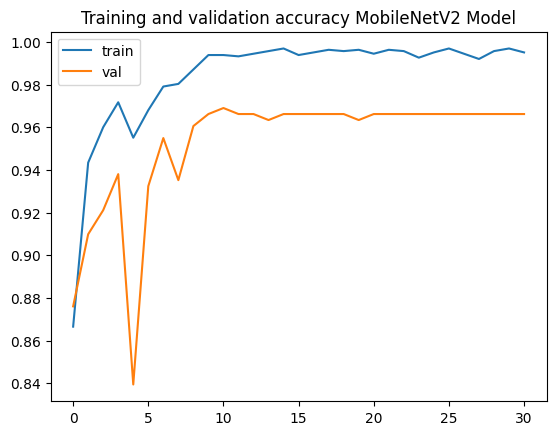

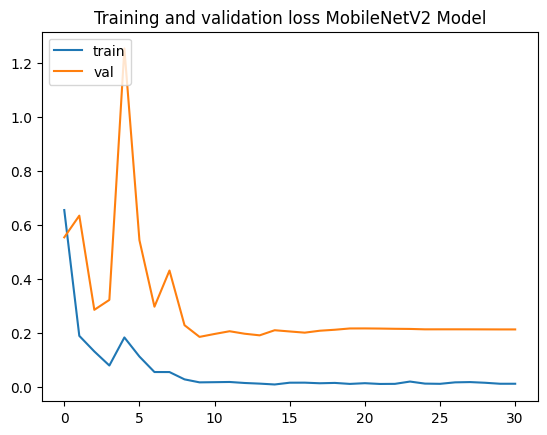

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_MobileNetV2_model_1.history['accuracy' ]
val_acc  = history_MobileNetV2_model_1.history['val_accuracy' ]
loss     = history_MobileNetV2_model_1.history['loss' ]
val_loss = history_MobileNetV2_model_1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy MobileNetV2 Model')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNetV2 Model')
plt.legend(['train', 'val'], loc='upper left')

# MobileNetV2 2

In [16]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Tomato_MobileNetV2_model2", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [17]:
# Define DIY Model
MobileNetV2_model2 = tf.keras.models.Sequential([
    # MobileNetV2 Layer
    MobileNetV2(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Average Pooling Layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
  ])
MobileNetV2_model2.layers[0].trainable = False

# Compile Model
MobileNetV2_model2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
MobileNetV2_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               327936    
                                                                 
 dense_7 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 2,586,948
Trainable params: 328,964
Non-

In [18]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_MobileNetV2_model_2 = MobileNetV2_model2.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
163/163 [==============================] - ETA: 0s - loss: 0.2715 - accuracy: 0.8868
Epoch 1: val_accuracy improved from -inf to 0.94366, saving model to Tomato_MobileNetV2_model2


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model2\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model2\assets


163/163 [==============================] - 20s 114ms/step - loss: 0.2715 - accuracy: 0.8868 - val_loss: 0.1724 - val_accuracy: 0.9437 - lr: 0.0010
Epoch 2/100
163/163 [==============================] - ETA: 0s - loss: 0.1254 - accuracy: 0.9545
Epoch 2: val_accuracy did not improve from 0.94366
163/163 [==============================] - 4s 23ms/step - loss: 0.1254 - accuracy: 0.9545 - val_loss: 0.1839 - val_accuracy: 0.9324 - lr: 0.0010
Epoch 3/100
162/163 [============================>.] - ETA: 0s - loss: 0.0769 - accuracy: 0.9684
Epoch 3: val_accuracy improved from 0.94366 to 0.95493, saving model to Tomato_MobileNetV2_model2


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model2\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model2\assets


163/163 [==============================] - 17s 104ms/step - loss: 0.0781 - accuracy: 0.9674 - val_loss: 0.1392 - val_accuracy: 0.9549 - lr: 0.0010
Epoch 4/100
163/163 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9723
Epoch 4: val_accuracy did not improve from 0.95493
163/163 [==============================] - 4s 23ms/step - loss: 0.0700 - accuracy: 0.9723 - val_loss: 0.1632 - val_accuracy: 0.9465 - lr: 0.0010
Epoch 5/100
160/163 [============================>.] - ETA: 0s - loss: 0.0589 - accuracy: 0.9749
Epoch 5: val_accuracy improved from 0.95493 to 0.96901, saving model to Tomato_MobileNetV2_model2


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model2\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model2\assets


163/163 [==============================] - 17s 103ms/step - loss: 0.0580 - accuracy: 0.9754 - val_loss: 0.1155 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 6/100
163/163 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9846
Epoch 6: val_accuracy did not improve from 0.96901
163/163 [==============================] - 4s 23ms/step - loss: 0.0376 - accuracy: 0.9846 - val_loss: 0.1840 - val_accuracy: 0.9549 - lr: 0.0010
Epoch 7/100
163/163 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9846
Epoch 7: val_accuracy did not improve from 0.96901
163/163 [==============================] - 4s 24ms/step - loss: 0.0472 - accuracy: 0.9846 - val_loss: 0.2281 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 8/100
161/163 [============================>.] - ETA: 0s - loss: 0.0426 - accuracy: 0.9838
Epoch 8: val_accuracy did not improve from 0.96901
163/163 [==============================] - 4s 22ms/step - loss: 0.0426 - accuracy: 0.9840 - val_loss: 0.1859 - val_accu

INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model2\assets


INFO:tensorflow:Assets written to: Tomato_MobileNetV2_model2\assets


163/163 [==============================] - 17s 105ms/step - loss: 0.0236 - accuracy: 0.9908 - val_loss: 0.1088 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 14/100
161/163 [============================>.] - ETA: 0s - loss: 0.0309 - accuracy: 0.9882
Epoch 14: val_accuracy did not improve from 0.97183

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
163/163 [==============================] - 4s 22ms/step - loss: 0.0305 - accuracy: 0.9883 - val_loss: 0.1935 - val_accuracy: 0.9577 - lr: 0.0010
Epoch 15/100
160/163 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9912
Epoch 15: val_accuracy did not improve from 0.97183
163/163 [==============================] - 4s 22ms/step - loss: 0.0192 - accuracy: 0.9908 - val_loss: 0.1499 - val_accuracy: 0.9662 - lr: 1.0000e-04
Epoch 16/100
162/163 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9994
Epoch 16: val_accuracy did not improve from 0.97183
163/163 [=====================

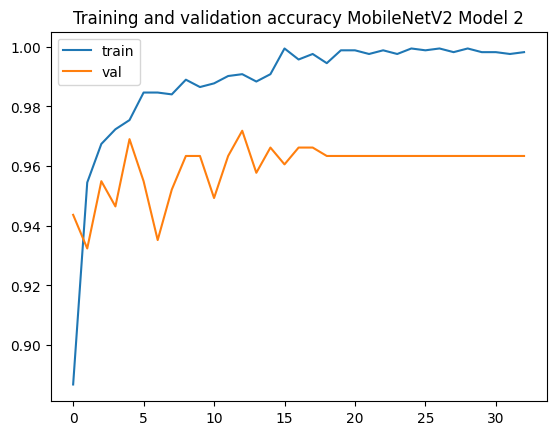

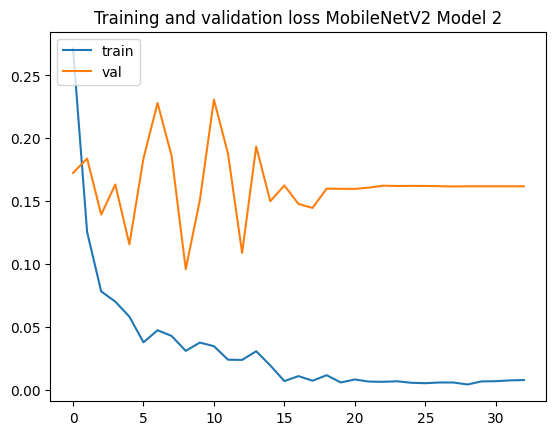

In [19]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_MobileNetV2_model_2.history['accuracy' ]
val_acc  = history_MobileNetV2_model_2.history['val_accuracy' ]
loss     = history_MobileNetV2_model_2.history['loss' ]
val_loss = history_MobileNetV2_model_2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy MobileNetV2 Model 2')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNetV2 Model 2')
plt.legend(['train', 'val'], loc='upper left')

# Xception

In [20]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Tomato_Xception_model", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [21]:
# Define Model
Xception_model = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
  ])
Xception_model.layers[0].trainable = False

# Compile Model
Xception_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
Xception_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d_2 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 dense_9 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,387,052
Trainable params: 525,572
Non-trainable params: 20,861,480
____________________________________

In [22]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_Xception_model_1 = Xception_model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
163/163 [==============================] - ETA: 0s - loss: 0.5814 - accuracy: 0.8549
Epoch 1: val_accuracy improved from -inf to 0.93521, saving model to Tomato_Xception_model


INFO:tensorflow:Assets written to: Tomato_Xception_model\assets


INFO:tensorflow:Assets written to: Tomato_Xception_model\assets


163/163 [==============================] - 22s 122ms/step - loss: 0.5814 - accuracy: 0.8549 - val_loss: 0.2403 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 2/100
163/163 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9373
Epoch 2: val_accuracy did not improve from 0.93521
163/163 [==============================] - 7s 40ms/step - loss: 0.1852 - accuracy: 0.9373 - val_loss: 0.4835 - val_accuracy: 0.8761 - lr: 0.0010
Epoch 3/100
163/163 [==============================] - ETA: 0s - loss: 0.1565 - accuracy: 0.9465
Epoch 3: val_accuracy did not improve from 0.93521
163/163 [==============================] - 7s 40ms/step - loss: 0.1565 - accuracy: 0.9465 - val_loss: 0.4118 - val_accuracy: 0.8986 - lr: 0.0010
Epoch 4/100
163/163 [==============================] - ETA: 0s - loss: 0.1382 - accuracy: 0.9453
Epoch 4: val_accuracy improved from 0.93521 to 0.96056, saving model to Tomato_Xception_model


INFO:tensorflow:Assets written to: Tomato_Xception_model\assets


INFO:tensorflow:Assets written to: Tomato_Xception_model\assets


163/163 [==============================] - 18s 113ms/step - loss: 0.1382 - accuracy: 0.9453 - val_loss: 0.1953 - val_accuracy: 0.9606 - lr: 0.0010
Epoch 5/100
163/163 [==============================] - ETA: 0s - loss: 0.0931 - accuracy: 0.9637
Epoch 5: val_accuracy did not improve from 0.96056
163/163 [==============================] - 7s 40ms/step - loss: 0.0931 - accuracy: 0.9637 - val_loss: 0.3561 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 6/100
163/163 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 0.9729
Epoch 6: val_accuracy did not improve from 0.96056
163/163 [==============================] - 7s 40ms/step - loss: 0.0708 - accuracy: 0.9729 - val_loss: 0.3341 - val_accuracy: 0.9324 - lr: 0.0010
Epoch 7/100
163/163 [==============================] - ETA: 0s - loss: 0.0868 - accuracy: 0.9692
Epoch 7: val_accuracy did not improve from 0.96056
163/163 [==============================] - 6s 40ms/step - loss: 0.0868 - accuracy: 0.9692 - val_loss: 0.2947 - val_accu

INFO:tensorflow:Assets written to: Tomato_Xception_model\assets


INFO:tensorflow:Assets written to: Tomato_Xception_model\assets


163/163 [==============================] - 19s 114ms/step - loss: 0.0246 - accuracy: 0.9908 - val_loss: 0.2297 - val_accuracy: 0.9634 - lr: 1.0000e-04
Epoch 12/100
163/163 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9951
Epoch 12: val_accuracy did not improve from 0.96338
163/163 [==============================] - 7s 40ms/step - loss: 0.0185 - accuracy: 0.9951 - val_loss: 0.2271 - val_accuracy: 0.9634 - lr: 1.0000e-04
Epoch 13/100
163/163 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9975
Epoch 13: val_accuracy improved from 0.96338 to 0.97183, saving model to Tomato_Xception_model


INFO:tensorflow:Assets written to: Tomato_Xception_model\assets


INFO:tensorflow:Assets written to: Tomato_Xception_model\assets


163/163 [==============================] - 19s 115ms/step - loss: 0.0155 - accuracy: 0.9975 - val_loss: 0.2088 - val_accuracy: 0.9718 - lr: 1.0000e-04
Epoch 14/100
163/163 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9975
Epoch 14: val_accuracy did not improve from 0.97183

Epoch 14: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
163/163 [==============================] - 7s 40ms/step - loss: 0.0161 - accuracy: 0.9975 - val_loss: 0.2189 - val_accuracy: 0.9606 - lr: 1.0000e-04
Epoch 15/100
163/163 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9951
Epoch 15: val_accuracy did not improve from 0.97183
163/163 [==============================] - 7s 40ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.2159 - val_accuracy: 0.9662 - lr: 1.0000e-05
Epoch 16/100
163/163 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9975
Epoch 16: val_accuracy did not improve from 0.97183
163/163 [=============

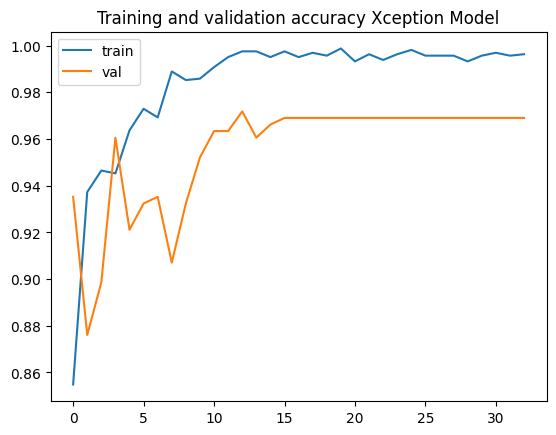

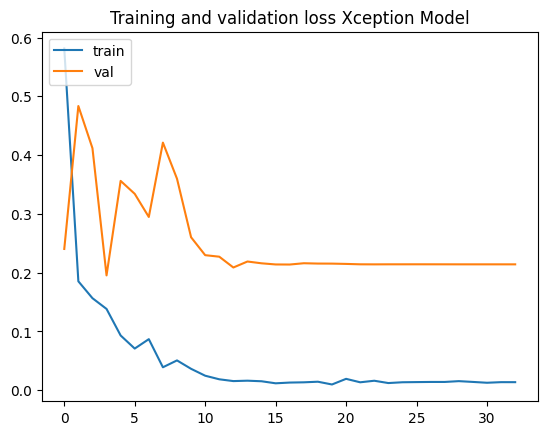

In [23]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Xception_model_1.history['accuracy' ]
val_acc  = history_Xception_model_1.history['val_accuracy' ]
loss     = history_Xception_model_1.history['loss' ]
val_loss = history_Xception_model_1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy Xception Model')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss Xception Model')
plt.legend(['train', 'val'], loc='upper left')

# Xception 2

In [24]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Tomato_Xception_model2", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [25]:
# Define Model
Xception_model2 = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Average Pooling Layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
  ])
Xception_model2.layers[0].trainable = False

# Compile Model
Xception_model2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
Xception_model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dense_11 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 21,387,052
Trainable params: 525,572
Non-trainable params: 20,861,480
____________________________________

In [26]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_Xception_model_2 = Xception_model2.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
162/163 [============================>.] - ETA: 0s - loss: 0.2784 - accuracy: 0.8979
Epoch 1: val_accuracy improved from -inf to 0.89859, saving model to Tomato_Xception_model2


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


163/163 [==============================] - 22s 122ms/step - loss: 0.2769 - accuracy: 0.8985 - val_loss: 0.4247 - val_accuracy: 0.8986 - lr: 0.0010
Epoch 2/100
163/163 [==============================] - ETA: 0s - loss: 0.1321 - accuracy: 0.9526
Epoch 2: val_accuracy improved from 0.89859 to 0.92958, saving model to Tomato_Xception_model2


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


163/163 [==============================] - 19s 113ms/step - loss: 0.1321 - accuracy: 0.9526 - val_loss: 0.3463 - val_accuracy: 0.9296 - lr: 0.0010
Epoch 3/100
163/163 [==============================] - ETA: 0s - loss: 0.1036 - accuracy: 0.9606
Epoch 3: val_accuracy improved from 0.92958 to 0.95211, saving model to Tomato_Xception_model2


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


163/163 [==============================] - 19s 115ms/step - loss: 0.1036 - accuracy: 0.9606 - val_loss: 0.2174 - val_accuracy: 0.9521 - lr: 0.0010
Epoch 4/100
163/163 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9754
Epoch 4: val_accuracy did not improve from 0.95211
163/163 [==============================] - 7s 40ms/step - loss: 0.0717 - accuracy: 0.9754 - val_loss: 0.2232 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 5/100
163/163 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.9680
Epoch 5: val_accuracy improved from 0.95211 to 0.96620, saving model to Tomato_Xception_model2


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


163/163 [==============================] - 19s 115ms/step - loss: 0.0900 - accuracy: 0.9680 - val_loss: 0.1504 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 6/100
163/163 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9760
Epoch 6: val_accuracy did not improve from 0.96620
163/163 [==============================] - 7s 39ms/step - loss: 0.0594 - accuracy: 0.9760 - val_loss: 0.2115 - val_accuracy: 0.9521 - lr: 0.0010
Epoch 7/100
163/163 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9852
Epoch 7: val_accuracy did not improve from 0.96620
163/163 [==============================] - 6s 40ms/step - loss: 0.0344 - accuracy: 0.9852 - val_loss: 0.2522 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 8/100
163/163 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9840
Epoch 8: val_accuracy did not improve from 0.96620
163/163 [==============================] - 7s 40ms/step - loss: 0.0504 - accuracy: 0.9840 - val_loss: 0.1491 - val_accu

INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


163/163 [==============================] - 19s 115ms/step - loss: 0.0372 - accuracy: 0.9859 - val_loss: 0.1848 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 12/100
163/163 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9895
Epoch 12: val_accuracy improved from 0.97183 to 0.97746, saving model to Tomato_Xception_model2


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


INFO:tensorflow:Assets written to: Tomato_Xception_model2\assets


163/163 [==============================] - 19s 114ms/step - loss: 0.0264 - accuracy: 0.9895 - val_loss: 0.1880 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 13/100
163/163 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9908
Epoch 13: val_accuracy did not improve from 0.97746

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
163/163 [==============================] - 7s 39ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.1771 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 14/100
163/163 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9969
Epoch 14: val_accuracy did not improve from 0.97746
163/163 [==============================] - 6s 39ms/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.1684 - val_accuracy: 0.9775 - lr: 1.0000e-04
Epoch 15/100
163/163 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9988
Epoch 15: val_accuracy did not improve from 0.97746
163/163 [=====================

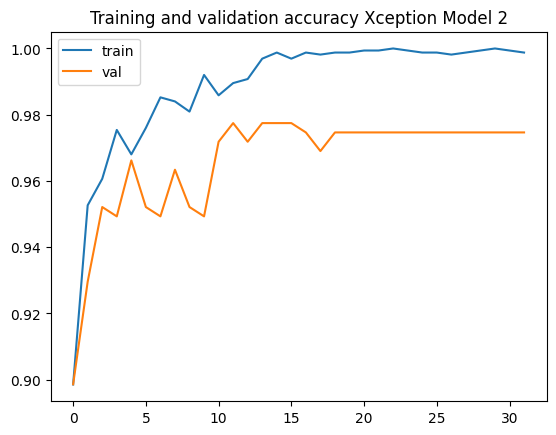

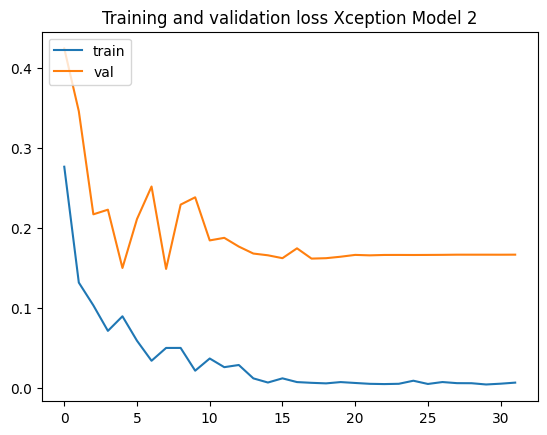

In [27]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Xception_model_2.history['accuracy' ]
val_acc  = history_Xception_model_2.history['val_accuracy' ]
loss     = history_Xception_model_2.history['loss' ]
val_loss = history_Xception_model_2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy Xception Model 2')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss Xception Model 2')
plt.legend(['train', 'val'], loc='upper left')